# Distribuciones continuas

<a id="toc"></a>
## Contenido

- [Instrucciones Generales](#Instruciones-Generales)
- [Función de densidad de probabilidad](#pdf)
- [Valor esperado y varianza de una v.a. continua](#evvar)
  - [Ejemplo](#ejvac)
    - [Función de densidad de probabilidad](#pdfej)
      - [$P(a<X<b)$](#axb)
      - [$P(X=x)$](#Xx)
    - [Función de distribución acumulada](#cdf)
    - [Función cuantil](#icdf)
    - [Cálculo del valor esperado y varianza](#ejev)
- [Algunas distribuciones continuas importantes](#dci)
  - [Distribución Uniforme](#unif)
    - [Ejemplo](#unife)
  - [Distribución Normal](#normal)
    - [Ejemplo 1](#normale1)
    - [Ejemplo 2](#normale2)
  - [Distribución exponencial](#expon)
    -[Ejemplo](#expone1)
  - [Simulación de una v.a. exponencial **(¡¡¡Importante para el deber!!!)**](#exponsim)
- [Experimente **(¡¡¡Importante!!!)**](#experience)
- [Anexos](#Anexos)
  - [Universality of the Uniform](#Anexo-1)
  - [Relationship betweenPoisson and Exponential distribution](#Anexo-2)

## Instruciones Generales

### Código

- Cuando aparezca esta imagen en el notebook, encontrará código Python que puede ser intermedio o avanzado. 

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/>

### Opcional: Practique Python

<br/><br/>

  - **Esta sección es opcional**.
  - Concéntrense en los conceptos que se están tratando. 
  - Cuando se sienta cómodo con Python estudie el código. 

### Experimentación

- Cuando aparezca esta imagen en el notebook, encontrará instrucciones de actividades de experimentación a realizar de forma autónoma para reforzar los temas tratados. 
  - Esto puede ser cambiar un fragmento del código. 
  - O realizar análisis adicionales sobre los resultados presentados. 

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>
<br/>

<a id="pdf"></a>
# Función de densidad de probabilidad

[Volver al índice](#toc)

- Una función de densidad de probabilidad (Probability Density Function, PDF), o densidad de una variable aleatoria continua, es una función $f_X$ que describe la probabilidad relativa de que la variable aleatoria $X$ tome un valor dado. Una v.a. $X$ tiene densidad $f(x)$ si

1. $f (x) \geq 0$, para toda $x \in \mathbb{R}$.
2. $\int_{-\infty}^{\infty} f(x) dx = 1$.
3. $P(a \leq X \leq b)=\int_{a}^{b} f(x) dx$.

- La Función de Distribución Acumulada, CDF $F(x)$, de una v.a. continua continua $X$ con
PDF $f(x)$, es
$$
F(x)=P(X \leq x) = \int_{-\infty}^{x} f(t) dt,\ 
-\infty < x < \infty 
$$
  - La CDF es el área acumulada bajo la PDF.

<a id="evvar"></a>
### Valor esperado y varianza de una v.a. continua

Sea $X$ una v.a. con PDF $f(x)$. El valor esperado de
$X$ se puede calcular como:

$$
\mu=E[X]=\int_{-\infty}^{\infty} x f(x) dx
$$

La varianza de $X$ está dada por:

$$
\sigma^2=E[(X-\mu)^2]=\int_{-\infty}^{\infty} (x-\mu)^2 f(x) dx
= \int x^2 f(x)dx - \mu^2
$$

La raíz cuadrada de la varianza, $\sigma$, se denomina desviación estándar de $X$.

<a id="pdfej"></a>
### Ejemplo:

[Volver al índice](#toc)

- Dada: 

$f(x) = \frac{x^2}{3}, \quad -1 < x < 2$

- Comprobemos que es una función de densidad válida:

$\int_{-\infty}^\infty f(x) dx = 1$

- Si $f(x)$ es una función de densidad válida debería comprobarse que:

$\int_{-1}^2 \frac{x^2}{3} dx = 1$

- Efectivamente $f(x) = \frac{x^2}{3}$ es una función de densidad válida:

$\int_{-1}^2 \frac{x^2}{3} dx = \frac{x^3}{9} \biggr|_{-1}^2 = \frac{(2)^3}{9} - \frac{(-1)^3}{9} = 
\frac{8}{9} - \frac{-1}{9} = \frac{9}{9} = 1$

<br/>

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/>

### Opcional: Practique Python
<br/>
<br/>

- Vamos a resolver el problema en Python, usando SymPy.
  - **SymPy** es una biblioteca de Python para matemáticas simbólicas.
  
- Realizamos los imports necesarios:

```Python
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy  # SymPy
```

- Definimos la variable a usar **x** y la función a **fx**:
```Python
x = sy.symbols('x')  # Definimos los símbolos a utlizar x
fx = sy.sympify('x^2 / 3')  # Definimos la función
```
  
- Esto permite a sympy manipular la función y realizar operaciones simbólicas, como integrar **fx** con repecto a **x** en el intervalo dado **(x, -1, 2)**:
```Python
sy.integrate(fx, (x, -1, 2))
```

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy  # SymPy
import seaborn as sns

x = sy.symbols('x')  # Definimos los símbolos a utlizar x
fx = sy.sympify('x^2 / 3')  # Definimos la función
print("Nuestra función (PDF) es:")
fx

Nuestra función (PDF) es:


x**2/3

- SymPy **lambdify** genera una función numérica a partir de una función simbólica:
  - **fx** definida arriba es nuestra función simbólica. 
  - **fx_num** nuestra función numérica obtenida usando **lambdify**. 
- Queremos una función numérica para evaluar un intervalo de valores **x_num**
  - Y graficar la curva de la función $x_{num}$ vs $f(x_{num})$.

```Python
fx_num = sy.lambdify(x, fx)  # creamos una función numérica a partir de la simbólica

x_num = np.linspace(-1, 2)  # intervalo para nuestra función de densidad

plt.plot(x_num, fx_num(x_num), linewidth='2')  # curva azul
# relleno naranja, alpha: transparencia
plt.fill_between(x_num, fx_num(x_num), color='orange', alpha=0.5)

area = sy.integrate(fx, (x, -1, 2))  # calculamos la integral de la función y evaluamos para el intervalo
```

Area bajo la curva (relleno naranja): 1


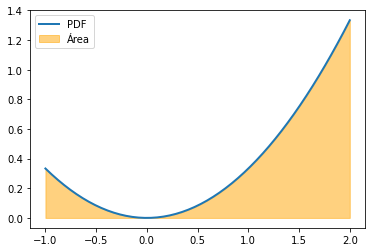

In [33]:
fx_num = sy.lambdify(x, fx)  # creamos una función numérica a partir de la simbólica para la PDF

x_num = np.linspace(-1, 2)  # intervalo para nuestra función de densidad

plt.plot(x_num, fx_num(x_num), linewidth='2', label="PDF")  # graficamos la función (curva azul)
plt.fill_between(x_num, fx_num(x_num), color='orange', label="Área", alpha=0.5)  # relleno naranja
plt.legend()

area = sy.integrate(fx, (x, -1, 2))  # calculamos la integral de la función y evaluamos para el intervalo

print("Area bajo la curva (relleno naranja):", area)

<a id="axb"></a>
### Calculemos la probabilidad $P(a\leq X \leq b)$

[Volver al índice](#toc)

- Calculemos la probabilidad siguiente $P(0.5 \leq X \leq 1.5)$:

$P(0.5 \leq X \leq 1.5) = \int_{0.5}^1 f(x) dx$

$\int_{0}^{1} \frac{x^2}{3} dx = \frac{x^3}{9} \biggr|_{0}^{1} = \frac{(1)^3}{9} - \frac{(0)^3}{9} = 
\frac{1}{9} - \frac{0}{9} = \frac{1}{9} = 0.111111$

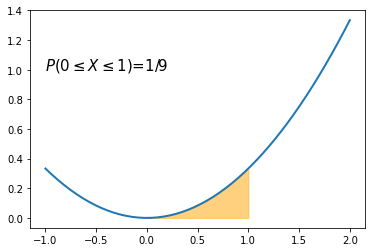

In [34]:
probabilidad = sy.integrate(fx, (x, 0, 1))

plt.plot(x_num, fx_num(x_num), linewidth='2')  # graficamos la función (curva azul)
x_prob = np.linspace(0, 1)
plt.fill_between(x_prob, fx_num(x_prob), color='orange', alpha=0.5)  # alpha: transparencia
text = plt.text(-1, 1, r"$P(0 \leq X \leq 1)$="+str(probabilidad), fontsize=15)

<a id="Xx"></a>
### Calculemos la probabilidad $P(X=x)$

[Volver al índice](#toc)

- Calculemos la probabilidad de $P(X=0.5)$:

- En los gráficos abajo podemos comprobar que $P(X=0.5) = 0$. 
  - En el caso continuo, contrario al caso discreto, no hace sentido preguntar la probabilidad de que una variable aleatoria tome exactamente un valor. 
  - Esta probabilidad es 0, $P(X=x) = 0$.
  - Lo que queremos responder por tanto es la probabilidad de que la variable aleatoria se encuentre en un intervalo dado $P(a \leq X \leq b)$. 

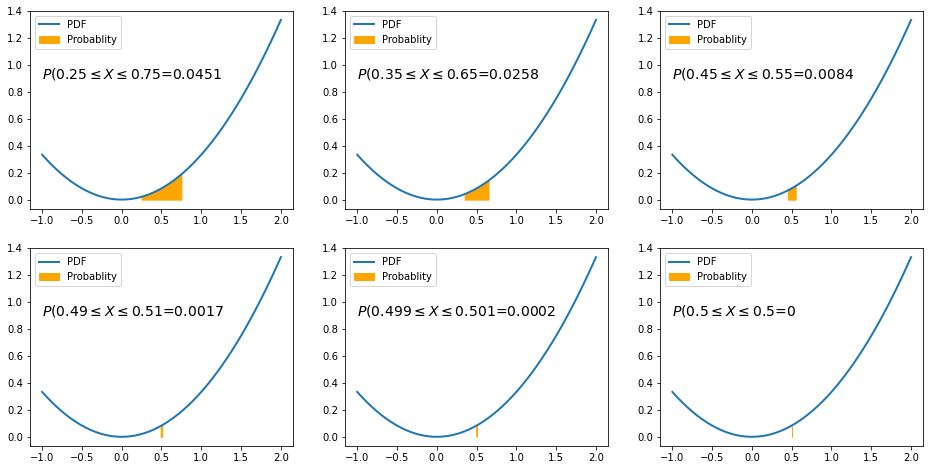

In [35]:
limites = [(0.25, 0.75), (0.35,0.65), 
           (0.45, 0.55), (0.49, 0.51),
           (0.499, 0.501), (0.5, 0.5)
          ]

plt.figure(figsize=(16,8))
for i, li in enumerate(limites):
    plt.subplot(2, 3, i+1)
    probabilidad = sy.integrate(fx, (x, *li))  # integramos
    plt.plot(x_num, fx_num(x_num), linewidth='2', label="PDF")  # graficamos la función (curva azul)
    x_prob = np.linspace(*li)  # intervalo li para el relleno
    plt.fill_between(x_prob, fx_num(x_prob), color='orange', label="Probablity")  # relleno naranja
    plt.legend()
    text = plt.text(-1, 0.9, r"$P(" + str(li[0]) 
                    + "\leq X \leq" + str(li[1]) 
                    + "$=" + str(round(probabilidad,4)), fontsize=14)

- Recordemos que una función de densidad de probabilidad (Probability Density Function, PDF), o densidad de una variable aleatoria continua, es una función $f_X$ que describe la **probabilidad relativa de que la variable aleatoria $X$ tome un valor dado**.
  - El valor $f_X(x)$ no expresa un valor de probabilidad, de hecho $f_X(2) = 1.333333$. 
- La función $f_X$ describe **la probabilidad relativa** de que la variable aleatoria $X$ tome un valor dado.
  - Por ejemplo en el gráfico abajo podemos observar que $f(0.5) < f(1.5)$, es decir es más probable observar un valor cercano a $X=1.5$ que un valor cercano a $X=0.5$. 

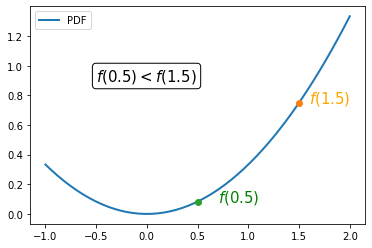

In [36]:
plt.plot(x_num, fx_num(x_num), linewidth='2', label="PDF")  # graficamos la función (curva azul)
plt.legend()
plt.plot(1.5, fx_num(1.5), 'o')  # punto naranja
plt.plot(0.5, fx_num(0.5), 'o')  # punto verde
plt.text(1.6, fx_num(1.5), r"$f(1.5)$", fontsize=15, color="orange")  # texto naranja
plt.text(0.7, fx_num(0.5), r"$f(0.5)$", fontsize=15, color="green")  # texto verde
text = plt.text(-0.5, 0.9, r"$f(0.5) < f(1.5)$", fontsize=15,
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.25'))  # texto enmarcado

<a id="cdf"></a>
### CDF $F(x)$

[Volver al índice](#toc)

- Calculemos la Función de Distribución Acumulada, CDF $F(x)$:

$F(x) = P(X\leq x) = \int_{-\infty}^x f(t) dt$

$F(x) = \int_{-1}^x \frac{t^2}{3} dt = \frac{t^3}{9} \Biggr|_{-1}^x = \frac{x^3}{9} + \frac{1}{9} = \frac{x^3+1}{9}$

In [37]:
t = sy.symbols('t')  # Definimos los símbolos a utlizar t
ft = sy.sympify('t^2 / 3')  # Definimos la función simbólica
ft

t**2/3

In [38]:
F = sy.integrate(ft, (t, -1, x))  # integramos para t en el intervalo -1, x
print("La función de distribución acumulada F(x) es:")
F

La función de distribución acumulada F(x) es:


x**3/9 + 1/9

- Vamos a graficar la PDF $f_X(x)$ y la CDF $F_X(x)$:

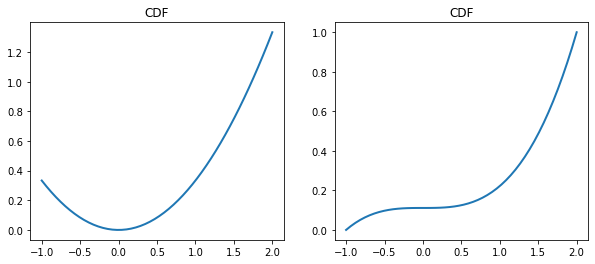

In [39]:
Fx_num = sy.lambdify(x, F)  # creamos una función numérica a partir de la simbólica para la CDF

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x_num, fx_num(x_num), linewidth='2', label="PDF")  # graficamos la PDF, fx_num
title = plt.title("CDF")

plt.subplot(1,2,2)
plt.plot(x_num, Fx_num(x_num), linewidth='2', label="CDF")  # Graficamos la CDF, Fx_num
title = plt.title("CDF")

- Calculemos la probabilidad siguiente $P(0.5 \leq X \leq 1.5)$:
  - Usando la PDF tuvimos que integrar. 
- Usando la CDF, vamos a calcular saltos de manera similar a como hicimos en el caso discreto. 

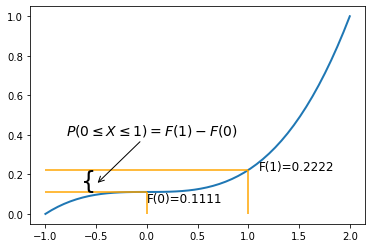

In [40]:
plt.plot(x_num, Fx_num(x_num), linewidth='2', label="CDF")  # Graficamos la CDF, Fx_num
# Agregamos textos al gráfico
plt.text(
    # Coordenada y etiqueta
    1.1, Fx_num(1), "F(1)="+str(np.round(Fx_num(1),4)), 
    # tamaño de texto
    fontsize=12)
plt.text(0, Fx_num(0)-0.05, "F(0)="+str(np.round(Fx_num(0),4)), fontsize=12)
hl = plt.vlines([0, 1], [0, 0], [Fx_num(0), Fx_num(1)], colors="orange")
vl = plt.hlines([Fx_num(0), Fx_num(1)], [-1, -1], [0, 1], colors="orange")
plt.text(-0.65, 0.13, "{",fontsize=24, fontweight=0,)
text = plt.annotate(
    # Etiqueta y coordenada
    r"$P(0 \leq X \leq 1)=F(1)-F(0)$", xy=(-0.5, 0.15), xytext=(-0.8, 0.4), fontsize=14,
    # Custom arrow
    arrowprops=dict(arrowstyle='->',lw=1)
)

- Probabilidad $P(a \leq X \leq b)$:

In [41]:
a, b = 0, 1
print("Integrando:", sy.integrate(fx, (x, a, b)).evalf(), # evalf() devuleve valor float
      "\nSalto en la CDF:", Fx_num(b) - Fx_num(a))

Integrando: 0.111111111111111 
Salto en la CDF: 0.1111111111111111


<a id="icdf"></a>
### Función cuantil $x := F^{-1}(p)$

[Volver al índice](#toc)

- Vamos a calcular la inversa de la función acumulada $x := F^{-1}(p)$

$p = \frac{x^3+1}{9}$ 

$x = (9p - 1)^{1/3}$

$F^{-1}(p) = (9p - 1)^{1/3}$

In [42]:
p = sy.symbols('p')
IF = sy.solve(F - p, x)[0]  # Inversa de F
IF

(9*p - 1)**(1/3)

- Vamos a evaluar la Inversa de la Acumulada, o función cuantil que acabamos de calcular **IF**
  - Vamos a generar su función numérica con **lambdify**.

Cuartiles: [1.0772 1.5183 1.7915]
Areas: [0.25, 0.50, 0.75]


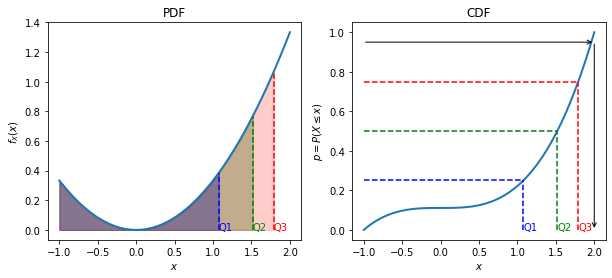

In [43]:
IF_num = sy.lambdify(p, IF)  # Inversa de la acumulada, función cuantil
prob = np.array([0.25, 0.5, 0.75])  # probabilidades que vamos a pasar a la función cuantil
Q = IF_num(prob)  # Cuartiles, obtenidos usando la función cuantil

colors = ["blue", "green", "red"]

plt.figure(figsize=(10,4))  # tamaño de figura
plt.subplot(1,2,1)  # Panel 1
plt.plot(x_num, fx_num(x_num), linewidth='2', label="CDF")  # Graficamos la PDF, fx_num
plt.vlines(Q, [0]*3, fx_num(Q), linestyles="dashed", colors=colors)  # líneas verticales
# Iteramos 3 veces, número de cuartiles a evaluar
for i in range(3):
    xq = np.linspace(-1, Q[i])  # desde el límite inferior hasta el cuartil
    plt.fill_between(xq, fx_num(xq), alpha=0.5-0.1*(i+1), color=colors[i])  # relleno
q_text = [plt.text(Q[i], 0, "Q"+str(i+1), color=colors[i]) for i in range(3)]  # agregamos textos
plt.xlabel(r'$x$')
plt.ylabel(r'$f_X(x)$')
plt.title("PDF")

plt.subplot(1,2,2)  # Panel 2
plt.plot(x_num, Fx_num(x_num), linewidth='2', label="CDF")  # Graficamos la CDF, Fx_num
plt.hlines(prob, [-1]*3, Q, linestyles="dashed", colors=colors)  # líneas horizontales
# flecha derecha 
plt.annotate("", xy=(-1, 0.95), xytext=(2, 0.95),
horizontalalignment="center", arrowprops=dict(arrowstyle='<-',lw=1))
plt.vlines(Q, [0]*3, prob, linestyles="dashed", colors=colors)  # líneas verticales
# flecha abajo
plt.annotate("", xy=(2, 0.95), xytext=(2, 0),
horizontalalignment="center", arrowprops=dict(arrowstyle='<-',lw=1))
q_text = [plt.text(Q[i], 0, "Q"+str(i+1), color=colors[i]) for i in range(3)]
plt.xlabel(r'$x$')
plt.ylabel(r'$p = P(X\leq x)$')
plt.title("CDF")

print("Cuartiles:", np.round(Q,4))
print("Areas:", [sy.integrate(fx, (x, -1, Qi)).evalf().round(2) for Qi in Q])

- Las flechas en el panel izquierdo indican la evaluación de la inversa de la acumulada CDF.

- Cuando evaluamos la CDF, $F(x)$, conocemos el valor de $x$ y obtenemos como resultado una probabilidad acumulada $P(X\leq x$). 
  - Es el proceso común en que evaluamos una función. 

- En la dirección de las flechas sabemos una probabilidad $p$ tal que $P(X \leq x) = p$, y queremos conocer $x$.

- Esto es evaluar en la inversa de la acumulada $F^{-1}(p) = x$, donde $x$ cumple la condición $P(X \leq x)$.

- Si evaluamos en nuestro ejemplo arriba $F^{-1}(p=0.25)$ obetenemos $x=1.0772$, que cumple que $P(X \leq 1.0772) = 0.25$, $F(1.0772) = 0.25$.

<a id="ejev"></a>
### Valor esperado y varianza de $X$:

[Volver al índice](#toc)

- Valor esperado $E[X]$
$$
\mu=E[X]=\int_{-\infty}^{\infty} x f(x) dx
$$

$$
E[X]=\int_{-1}^{2} x \cdot \frac{x^2}{3} dx = \int_{-1}^{2} \frac{x^3}{3} dx = 
\frac{x^4}{12}\biggr|_{-1}^{2} = \frac{2^4}{12} - \frac{-1^4}{12} = 
\frac{16}{12} - \frac{1}{12} = \frac{15}{12} = 1.25
$$

- La varianza de $X$ está dada por:

$$
\sigma^2=E[(X-\mu)^2]=\int_{-\infty}^{\infty} (x-\mu)^2 f(x) dx
= \int x^2 f(x)dx - \mu^2
$$

- Tal como está expresada en la ecuación arriba, compruebe que la varianza puede ser calculada como:

$$Var[X] = E[X^2] - (E[X])^2$$

- Calculemos la varianza:

$$
E[X^2]=\int_{-1}^{2} x^2 \cdot \frac{x^2}{3} dx = \int_{-1}^{2} \frac{x^4}{3} dx = 
\frac{x^5}{15}\biggr|_{-1}^{2} = \frac{2^5}{15} - \frac{-1^5}{15} = 
\frac{32}{15} + \frac{1}{15} = \frac{33}{15} = 2.2
$$

$$Var[X] = E[X^2] - (E[X])^2 = 2.2 - 1.25^2 = 0.6375$$

In [44]:
EX = sy.integrate(x*fx, (x, -1, 2)).evalf()
varX = sy.integrate((x-EX)**2*fx, (x, -1, 2)).evalf()  # 𝐸[(𝑋−𝜇)^2]

print("E[X] =", EX.round(2))
print("Var[X] =", varX.round(4))

E[X] = 1.25
Var[X] = 0.6375


<a id="dci"></a>
## Algunas distribuciones continuas importantes

[Volver al índice](#toc)

<a id="unif"></a>
### Distribución Uniforme

- Intuitivamente, una v.a. Uniforme en el intervalo $(a, b)$
es un número completamente aleatorio entre $a$ y $b$.

- Formalizamos la noción de completamente aleatorio en un intervalo especificando que la PDF debe ser constante en el intervalo.

- Se dice que una v.a. continua $U$ tiene la
**Distribución uniforme** en el intervalo $(a, b)$ si su PDF es

$$ f(x) =
  \begin{cases}
    \frac{1}{b-a}       & \quad \text{if } a < x < b, \\
    0  & \quad \text{otherwise.}\\
  \end{cases}
$$

- Lo denotamos por $ U \sim Unif (a, b) $.

- La CDF es el área acumulada bajo la PDF:

$$ F(x) =
  \begin{cases}
    0 & \quad \text{if } x \leq a, \\
    \frac{x-a}{b-a}       & \quad \text{if } a < x < b, \\
    1  & \quad \text{if } x \geq b.\\
  \end{cases}
$$

- La distribución uniforme que se usa con más frecuencia es la
Distribución $Unif(0,1)$, también llamada Uniforme estándar.

### Unif(0,1) PDF and CDF.

![](https://i.imgur.com/nncfd7a.png)


- Valor esperado y varianza:
$$
E(U)=\frac{a+b}{2},\quad Var(U)=\frac{(b-a)^2}{12}.
$$

- La distribución uniforme estándar es muy útil dado a partir de ella podemos generar prácticamente cualquier otra distribución. 
  - **Vea el anexo** al final de este notebook.

### Python PDF y CDF

- Recuerde que para el caso discreto usamos:
  - PMF: dist.pmf(x, params), función de masa de probabilidad $P(X=x)$
  - CDF: dist.cdf(x, params), función de distribución acumulada $P(X<=x)$.

- **Para el caso continuo usamos:**
  - PDF: dist.pdf(x, params), función de densidad de probabilidad
  - CDF: dist.cdf(x, params), función de distribución acumulada $P(X<=x)$

<a id="unife"></a>
### Ejemplo

[Volver al índice](#toc)

Suponga que el tiempo máximo que se puede reservar una sala de conferencias grande de cierta empresa son cuatro horas. Con mucha frecuencia tienen conferencias extensas y breves. De hecho, se puede suponer que la duración X de una conferencia tiene una distribución uniforme en el intervalo [0, 4].

- Nuestra variable aleatoria está distribuida como $X\sim U(a, b), a=0, b=4.$

a) ¿Cuál es la probabilidad de que cualquier conferencia determinada dure al menos 3 horas?

- Integrando la $f(x)$ definida arriba:
$$P(X\geq 3) = \int_3^4 \frac{1}{4-0} dx = \frac{x}{4}\biggr|_{3}^{4} = \frac{4}{4} - \frac{3}{4} = 0.25$$

- Usando la CDF, F(x), definida arriba:
$$P(X\geq 3) = 1 - P(X\leq 3) = 1 - F(3) = 1 - \frac{x-a}{b-a} = 1 - \frac{3-0}{4-0} = 1 - \frac{3}{4} = 1 - 0.75 = 0.25$$

b) ¿Grafique la función de densidad de probabilidad y la función de distribución acumulada? 

P(X>=3) = 1 - P(X <= 3) = 1 - F(3) =  0.25
P(X>=3) = Integral(fx,  [x, 3, 4]) =  0.25


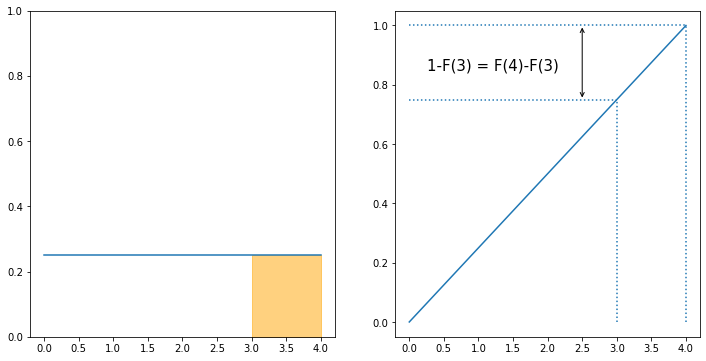

In [45]:
from scipy.stats import uniform

a, b = 0, 4
x = np.linspace(a, b)  # valores de x a evaluar, entre a y b

plt.figure(figsize=(12,6))  # tamaño de la figura

plt.subplot(1,2,1)  # Panel 1
pdfx = uniform.pdf(x, a, b-a)  # Python espera valor mínimo a, y ancho, b-a
plt.plot(x, pdfx)
plt.ylim(0, 1)  # límite en y para el gráfico

x_prob = np.linspace(3, 4)  # intervalo para el relleno y para integrar
plt.fill_between(x_prob, uniform.pdf(x_prob, a, b-a), color="orange", alpha=0.5)

plt.subplot(1,2,2)  # Panel 2
pdfx = uniform.cdf(x, a, b-a)  # Python espera valor mínimo a, y ancho, b-a
plt.plot(x, pdfx)
x = [3, 4]
plt.vlines(x, [0]*2, uniform.cdf(x, a, b-a), linestyles="dotted")
plt.hlines(uniform.cdf(x, a, b-a), [0]*2, x, linestyles="dotted")
plt.annotate('', xy=(2.5,0.75), xytext=(2.5,1), arrowprops=dict(arrowstyle='<->'))
plt.text(0.25, 0.85, "1-F(3) = F(4)-F(3)", fontsize=15)

# Respuesta usando la CDF
print("P(X>=3) = 1 - P(X <= 3) = 1 - F(3) = ", 1 - uniform.cdf(3, a, b-a))
# Integramos numéricamente usando la regla del trapecio
print("P(X>=3) = Integral(fx,  [x, 3, 4]) = ", np.trapz(uniform.pdf(x_prob, a, b-a), x_prob))

- Arriba para calcular el area sombreada en naranja hemos usado integración numérica.
  - Vea: https://en.wikipedia.org/wiki/Trapezoidal_rule
  
- Sintaxis:
```Python
np.trapz(y, x)
```
  - Vea: https://numpy.org/doc/stable/reference/generated/numpy.trapz.html

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>

- Calcule la probabilidad encontrada arriba, el valor esperado y la varianza usando **sympy**.

<a id="normal"></a>
## Distribución Normal

[Volver al índice](#toc)

- La distribución Normal es una distribución continua famosa cuya PDF tiene forma de campana. 

- Es muy utilizada en estadística debido al teorema del límite central que dice que bajo supuestos muy débiles, la suma de un gran número de variables aleatorias i.i.d. tiene una distribución aproximadamente Normal, **independientemente de la distribución** de las v.a.s. individuales. 

- Esto significa que podemos empezar con v.a.s. independientes de casi cualquier distribución, discreta o continua, pero una vez que sumamos muchas de ellas, la distribución de la v.a. resultante parece seguir una distribución Normal.

  - Demostraremos esto cuando tratemos distribuciones muestrales e inferencia estadística.

- Se dice que una v.a. continua tiene la distribución **Normal** si su PDF está dada por
$$
f(x|\mu,\sigma)=\frac{1}{\sigma \sqrt{2 \pi}}
e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$


- **Distribución Normal Estándar.** Se dice que una v.a. continua $Z$ tiene la distribución Normal estándar si su PDF $\phi$ está dada por
$$
\phi(z)=\frac{1}{\sqrt{2 \pi}}
e^{-\frac{-z^2}{2}},\quad -\infty < z < \infty
$$

- La CDF normal estándar $\Phi$ es el área acumulada bajo la PDF:

$$
\Phi(z)=\int_{-\infty}^z \phi(t)dt=\int_{-\infty}^z 
\frac{1}{\sqrt{2 \pi}}
e^{-\frac{-t^2}{2}} dt.
$$


- Hay varias propiedades de simetría importantes que se pueden deducir de la PDF y CDF normales estándar.

    1. Simetría de la PDF: $\phi$ satisfies $\phi(z) = \phi(-z)$, ej., $\phi$ es una función par.
    2. Simetría de las áreas de la cola: el área bajo la curva PDF a la izquierda de -2,
     que es $P (Z \leq 2) = \Phi(-2)$ por definición, es igual al área a la derecha de 2, que es $P (Z \geq 2) = 1-\Phi(2)$. En general, tenemos
    $$
    \Phi(z)=1-\Phi(-z)
    $$
    for all $z$.
    3. Simetría de $Z$ y $-Z$: Si $Z \sim N(0, 1)$, entonces $-Z \sim N(0, 1)$ también.


- Si $Z \sim N (0, 1)$, entonces
$$
X=\mu+\sigma Z
$$
se dice que tiene **Distribución normal** con media $\mu$ y varianza $\sigma^2$. Esto lo denotamos por $X \sim N (\mu,\sigma^2)$.


- Por supuesto, si podemos pasar de $Z$ a $X$, podemos volver de $X$ a $Z$.
El proceso de obtener una Normal estándar a partir de una Normal no estándar se denomina, apropiadamente, **estandarización**. Para $X \sim N (\mu,\sigma^2)$, la versión estandarizada de $X$ es
$$
\frac{X-\mu}{\sigma}\sim N(0,1).
$$
  - El valor resultante $z$ se conoce como **variable estandarizada** (en inglés **z-score.**).


- **(Regla 68-95-99.7\%)** Si $X \sim N(\mu,\sigma^2)$, entonces
$$P(|X-\mu|<\sigma) \approx 0.6827 $$
$$P(|X-\mu|<2\sigma) \approx 0.9545 $$
$$P(|X-\mu|<3\sigma) \approx 0.9973 $$


- Reproduciremos la figura en: https://en.wikipedia.org/wiki/Normal_distribution, para diferentes parámetros de la distribución ($\mu, \sigma^2$). 
  - La implementación en Python espera que pasemos los parámetros **loc**=$\mu$ y **scale=**$\sigma$, media y desviación estándar.
  - Vea: https://www.itl.nist.gov/div898/handbook/eda/section3/eda364.htm

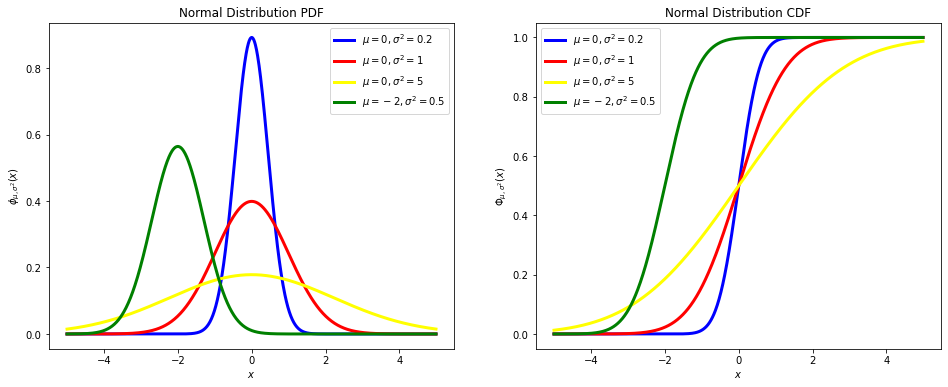

In [46]:
from scipy.stats import norm

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)  # panel 1

# mu_i (media i)
# sigma_i (desviación estándar i)
mu_1, sigma_1 = 0, np.sqrt(0.2)

# Evaluamos la pdf en el intervalo -5, 5, cada 0.01
x = np.arange(-5, 5, 0.01)  
px = norm.pdf(x, mu_1, sigma_1)

plt.plot(x, px, linestyle="-", color="blue", linewidth=3)

# Segunda curva
mu_2, sigma_2 = 0, 1

# Evaluamos la pdf en el intervalo -5, 5, cada 0.01
x = np.arange(-5, 5, 0.01)  
px = norm.pdf(x, mu_2, sigma_2)  # pdf de la va

plt.plot(x, px, linestyle="-", color="red", linewidth=3)

# Tercera curva
mu_3, sigma_3 = 0, np.sqrt(5)

# Evaluamos la pdf en el intervalo -5, 5, cada 0.01
x = np.arange(-5, 5, 0.01)
px = norm.pdf(x, mu_3, sigma_3)

plt.plot(x, px, linestyle="-", color="yellow", linewidth=3)

# Cuarta curva
mu_4, sigma_4 = -2, np.sqrt(0.5)

# Evaluamos la pdf en el intervalo -5, 5, cada 0.01
x = np.arange(-5, 5, 0.01)
px = norm.pdf(x, mu_4, sigma_4)

plt.plot(x, px, linestyle="-", color="green", linewidth=3)
plt.title("Normal Distribution PDF")
plt.legend([r"$\mu=0, \sigma^2=0.2$", r"$\mu=0, \sigma^2=1$", 
           r"$\mu=0, \sigma^2=5$", r"$\mu=-2, \sigma^2=0.5$"])
plt.xlabel(r"$x$")
yl=plt.ylabel(r"$\phi_{\mu, \sigma^2}(x)$")


# Graficamos la CDF automatizando el código arriba
plt.subplot(1,2,2)  # Panel 2
parametros = [(mu_1, sigma_1, "blue"), (mu_2, sigma_2, "red"), 
              (mu_3, sigma_3, "yellow"), (mu_4, sigma_4, "green")]

for mu, sigma, color in parametros:
    x = np.arange(-5, 5, 0.01)  # intervalo a evaluar
    Fx = norm.cdf(x, mu, sigma)
    plt.plot(x, Fx, linestyle="-", color=color, linewidth=3)
plt.title("Normal Distribution CDF")
plt.legend([r"$\mu=0, \sigma^2=0.2$", r"$\mu=0, \sigma^2=1$", 
           r"$\mu=0, \sigma^2=5$", r"$\mu=-2, \sigma^2=0.5$"])
plt.xlabel(r"$x$")
yl=plt.ylabel(r"$\Phi_{\mu, \sigma^2}(x)$")

<a id="normale1"></a>
### Ejemplo 

[Volver al índice](#toc)

- Una empresa de material eléctrico fabrica bombillas de luz cuya duración, antes de quemarse, se distribuye normalmente con una media igual a 800 horas y una desviación estándar de 40 horas. Calcule la probabilidad de que una bombilla se queme entre 778 y 834 horas.
  - Tenemos que la duración de las bombillas está distribuida como $X \sim N(\mu=800$, $\sigma=40$).
  - Debemos responder: $P(778<X<834)$.

Integrando: P(778<X<834) =  0.5111777005485865
Usando la CDF: P(778<X<834) = F(834) - F(778) = 0.5111777700889613


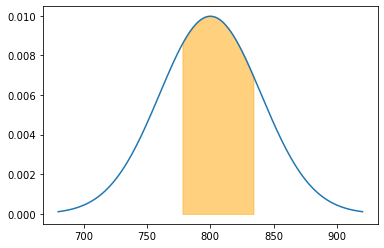

In [47]:
mu = 800  # media
sigma = 40  # desviación estándar

# graficamos la pdf para un intervalo en x a +- 3 desviaciones de la media
x = np.linspace(mu-3*sigma, mu+3*sigma, 200)  # evaluamos 200 valores en el intervalo para suavizar
plt.plot(x, norm.pdf(x, mu, sigma))  # PDF

# sombreamos el area de interés P(778<X<834)
x_prob = np.linspace(778, 834, 1000) # 1000 puntos en x para integrar numéricamente
plt.fill_between(x_prob, norm.pdf(x_prob, mu, sigma), color="orange", alpha=0.5)

print("Integrando: P(778<X<834) = ", 
      np.trapz(norm.pdf(x_prob, mu, sigma), x_prob))
print("Usando la CDF: P(778<X<834) = F(834) - F(778) =", 
      norm.cdf(834, mu, sigma) - norm.cdf(778, mu, sigma))

- Podemos responder el ejercicio usando la distribución normal estándar $Z \sim N(\mu=0, \sigma=1)$:

- Para nuestra distribución original tenemos  $X \sim N(\mu_X=800, \sigma_X=40)$. 

- Los valores $z$ que corresponden a $x_1 = 778$ y $x_2 = 834$ son:

$$
z_1 = \frac{x_1 - \mu_X}{\sigma_X} = \frac{778 - 800}{40} = -0.55, 
\quad z_2 = \frac{x_2 - \mu_X}{\sigma_X} = \frac{834 - 800}{40} = 0.85.
$$


Integrando numéricamente: P(-0.55<X<0.85) =  0.5111777005485865
Usando la CDF: P(-0.55<X<0.85) = F(0.85) - F(-0.55) = 0.5111777700889613


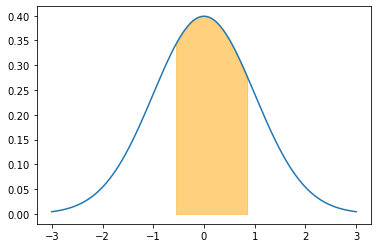

In [48]:
# Vamos a estandarizar X
mu = 800  # media
sigma = 40  # desviación estándar

z1 = (778 - mu)/sigma
z2 = (834 - mu)/sigma

# Construimos el gráfico anterior para Z ~ N(0, 1)
# Omitimos mu y sigma para llamar norm.pdf y norm.cdf. 
# Dado que los valores por defecto son mu=0, sigma=1.
# graficamos la pdf para un intervalo en x a +- 3 desviaciones de la media
x = np.linspace(-3, 3, 200)  # 200 valores en el intervalo para suavizar
plt.plot(x, norm.pdf(x))  # PDF

# sombreamos el area de interés P(778<X<834)
x_prob = np.linspace(z1, z2, 1000) # 1000 puntos en x para integrar numéricamente
plt.fill_between(x_prob, norm.pdf(x_prob), color="orange", alpha=0.5)

print("Integrando numéricamente: P("+str(z1)+"<X<"+str(z2)+") = ", 
      np.trapz(norm.pdf(x_prob), x_prob))
print("Usando la CDF: P("+str(z1)+"<X<"+str(z2)+") = F("+str(z2)+") - F("+str(z1)+") =", 
      norm.cdf(z2) - norm.cdf(z1))

<a id="normale2"></a>
### Ejemplo

[Volver al índice](#toc)

- En un proceso industrial el diámetro de un cojinete de bolas es una medida importante. 
El comprador establece que las especificaciones en el diámetro sean 3.0 $\pm$ 0.01 cm. Esto implica que no se aceptará ninguna parte que no cumpla estas especificaciones. Se sabe que en el proceso el diámetro de un cojinete tiene una distribución normal con media $\mu = 3.0$ y una desviación estándar $\sigma = 0.005$. En promedio, ¿cuántos de los cojinetes fabricados se descartarán?
  - Tenemos que el diámetro de los cojinentes producidos está distribuido como $X \sim N(\mu=3.0$, $\sigma=0.005$).
  - Debemos responder: $P(2.99<X<3.01)$.

Integrando numéricamente: P(X<2.99) + P(X>3.01) =  0.045436993187244354
Usando la CDF: 1 - P(2.99<X<3.01) = 1 - (F(3.01) - F(2.99)) = 0.04550026389636308


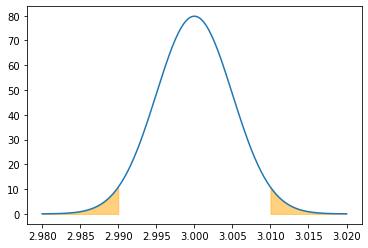

In [49]:
mu = 3.0  # media
sigma = 0.005  # desviación estándar

x1 = 2.99
x2= 3.01

# graficamos la pdf para un intervalo en x a +- 4 desviaciones de la media
x = np.linspace(mu-4*sigma, mu+4*sigma, 200)  # 200 valores en el intervalo para suavizar
plt.plot(x, norm.pdf(x, mu, sigma))  # PDF

# sombreamos el area de interés 1 - P(x1<X<x2)
x_prob_left = np.linspace(mu-4*sigma, x1, 1000)  # evaluamos 1000 valores en la cola izquierda, de -4 a x1
plt.fill_between(x_prob_left, norm.pdf(x_prob_left, mu, sigma), color="orange", alpha=0.5)
x_prob_right = np.linspace(x2, mu+4*sigma, 1000)  # evaluamos 1000 valores en la cola derecha, de x2 a 4
plt.fill_between(x_prob_right, norm.pdf(x_prob_right, mu, sigma), color="orange", alpha=0.5)

# Integramos las colas, región sombreada, sumamos ambas colas
print("Integrando numéricamente: P(X<"+str(x1)+") + P(X>"+str(x2)+") = ", 
      np.trapz(norm.pdf(x_prob_left, mu, sigma), x_prob_left) + 
      np.trapz(norm.pdf(x_prob_right, mu, sigma), x_prob_right))

print("Usando la CDF: 1 - P("+str(x1)+"<X<"+str(x2)+") = 1 - (F("+str(x2)+") - F("+str(x1)+")) =", 
      1 - (norm.cdf(x2, mu, sigma) - norm.cdf(x1, mu, sigma)))

- Como resultado se anticipa que, en promedio, se descartarán 4.55% de los cojinetes fabricados.

- Para dar la respuesta anterior hemos usado el valor obtenido usando la CDF $1 - P(2.99<X<3.01) = 1 - (F(3.01) - F(2.99)) = 0.0455$. 
  - La integración numérica, como todo método numérico, tiene un error de redondeo y de truncamiento. 
  - En este caso también influye en el error de la respuesta, los límites en los que se están evaluando las colas. 
    - ¿Puede identificar en el código estos límites, y cuáles son los límites de la distribución? 

- Podemos responder el ejercicio usando la distribución normal estándar $Z \sim N(\mu=0, \sigma=1)$:

- Para nuestra distribución original tenemos  $X \sim N(\mu_X=3, \sigma_X=0.005)$. 

- Los valores $z$ que corresponden a $x_1 = 2.99$ y $x_2 = 3.01$ son:

$$
z_1 = \frac{x_1 - \mu_X}{\sigma_X} = \frac{2.99 - 3}{0.005} = -2, 
\quad z_2 = \frac{x_2 - \mu_X}{\sigma_X} = \frac{3.01 - 3}{0.005} = 2.
$$

Integrando numéricamente: P(X<-2.0) + P(X>2.0) =  0.045436993187239746
Usando la CDF: 1 - P(-2.0<X<2.0) = 1 - (F(2.0) - F(-2.0)) = 0.04550026389635842


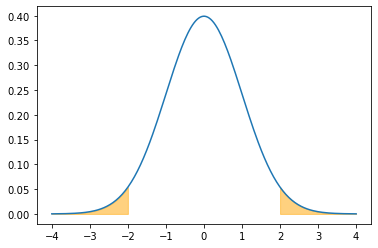

In [50]:
# Vamos a estandarizar X
mu = 3  # media
sigma = 0.005  # desviación estándar

z1 = np.round((2.99 - mu)/sigma, 4)
z2 = np.round((3.01 - mu)/sigma, 4)

# Construimos el gráfico anterior para Z ~ N(0, 1)
# Omitimos mu y sigma para llamar norm.pdf y norm.cdf. 
# Dado que los valores por defecto son mu=0, sigma=1.
# graficamos la pdf para un intervalo en x a +- 3 desviaciones de la media
x = np.linspace(-4, 4, 200)  # 200 valores en el intervalo para suavizar
plt.plot(x, norm.pdf(x))  # PDF

# sombreamos el area de interés 1 - P(x1<X<x2)
x_prob_left = np.linspace(-4, z1, 1000)  # evaluamos 1000 valores en la cola izquierda, de -4 a z1
plt.fill_between(x_prob_left, norm.pdf(x_prob_left), color="orange", alpha=0.5)
x_prob_right = np.linspace(z2, 4, 1000)  # evaluamos 1000 valores en la cola derecha, de z2 a 4
plt.fill_between(x_prob_right, norm.pdf(x_prob_right), color="orange", alpha=0.5)

# Integramos las colas, región sombreada, sumamos ambas colas
print("Integrando numéricamente: P(X<"+str(z1)+") + P(X>"+str(z2)+") = ", 
      np.trapz(norm.pdf(x_prob_left), x_prob_left) + 
      np.trapz(norm.pdf(x_prob_right), x_prob_right))

print("Usando la CDF: 1 - P("+str(z1)+"<X<"+str(z2)+") = 1 - (F("+str(z2)+") - F("+str(z1)+")) =", 
      1 - (norm.cdf(z2) - norm.cdf(z1)))

- De nuevo use como referencia el valor obtenido usando la CDF. 

<a id="expon"></a>
## Distribución exponencial 

[Volver al índice](#toc)

- La distribución Exponencial es la contraparte continua de la distribución Geométrica. 
- Recuerde que una variable aleatoria geométrica cuenta el número de fallas antes del primer éxito en una secuencia de experimentos de Bernoulli. 
- La historia de la distribución Exponencial es análoga, pero ahora estamos esperando un éxito en tiempo continuo, donde los éxitos llegan a una tasa de $\lambda$ éxitos por unidad de tiempo. 
- El número promedio de éxitos en un intervalo de tiempo de longitud $t$ es $\lambda t$, aunque el número real de éxitos varía aleatoriamente. 
- Una variable aleatoria exponencial representa el tiempo de espera hasta la primera llegada de un éxito.

- Consideremos un proceso de poisson con parámetro $\lambda$. Estamos observando el proceso desde el tiempo $t_0$.

    ![](https://i.imgur.com/yPEiytQ.png)
    
    - $X$: tiempo transcurrido entre $t_0$ y la siguiente llegada (éxito) del proceso
    - $\lambda$: parámetro de tasa de ocurrencia, ej. llegadas por unidad de tiempo


- Se dice que una v.a. continua $X$ tiene la **Distribución exponencial** con parámetro $\lambda$ si su PDF es:
$$
f(x)=\lambda e^{-\lambda x},\quad x>0.
$$
  - Denotamos esto como $X \sim Expo(\lambda)$.

- La CDF correspondiente es: 
$$
F(x)=1-e^{-\lambda x}, \quad x > 0.
$$

- Valor esperado y varianza:
$$
E(X)=\frac{1}{\lambda} (=\beta),\quad Var(X)=\frac{1}{\lambda^2}(=\beta^2)
$$

### Propiedad de no memoria (Memoryless property)

- La distribución exponencial tiene una propiedad muy especial llamada **propiedad sin memoria**, que dice que incluso si ha esperado durante horas o días sin éxito, no es más probable que la ocurrencia del éxito llegue pronto. 
  - De hecho, bien podría haber comenzado a esperar hace 10 segundos.
  - La distribución exponencial no tiene memoria. 

- Considere un proceso de poisson que comienza a observarse a partir de un instante $t_0$. Entonces si no ha habido llegadas por un tiempo transcurrido $t$, la variable aleatoria que representa el tiempo restante hasta la próxima llegada tiene una distribución exponencial con parámetro $\lambda$.
    
- Sea $s$ el tiempo que falta para la próxima llegada del proceso:
    
    ![](https://i.imgur.com/GniJFk4.png)
    
- Demostremos que:
    $$
    P(X\leq t+s | X > t) = 1 - e^{\lambda s}
    $$
    
    $$
    P(X>t+s | X>t) = \frac{P(X>t+s \cap X>t)}{P(X>t)} 
    = \frac{P(X>t+s \cap X>t)}{1 - P(X \leq t)} 
    $$
    
    $$ = \frac{P(X>t+s)}{1-P(X \leq t)} 
     = \frac{1 - P(X \leq t+s)}{1-P(X \leq t)} 
    $$
    
    $$ = \frac{1 - [1 - e^{-\lambda(t+s)}]}{1 - [1 - e^{-\lambda t}]}
     = \frac{e^{-\lambda(t+s)}}{e^{-\lambda t }}
     = e^{-\lambda s}
    $$

### Aplicaciones:

1. El tiempo hasta que se desintegra una partícula radiactiva, o el tiempo entre clics de un contador geiger.
2. El tiempo que transcurre antes de su próxima llamada telefónica.
3. En la teoría de las colas, los tiempos de servicio de los agentes en un sistema (por ejemplo, cuánto tarda un cajero bancario, etc. en atender a un cliente) a menudo se modelan como variables distribuidas exponencialmente.
4. En hidrología, la distribución exponencial se utiliza para analizar valores extremos de variables tales como valores máximos mensuales y anuales de lluvia diaria y volúmenes de descarga de ríos.

---

- Reproduciremos la figura en: https://en.wikipedia.org/wiki/Exponential_distribution, para diferentes valores del parámetro $\lambda$.
  - Note que la implementación en Python está esperando que pasemos $\beta=\frac{1}{\lambda}$ como parámetro de escala de la distribución, **scale=$\beta$**.
  - Por defecto el parámetro de ubicación es **loc=0**.

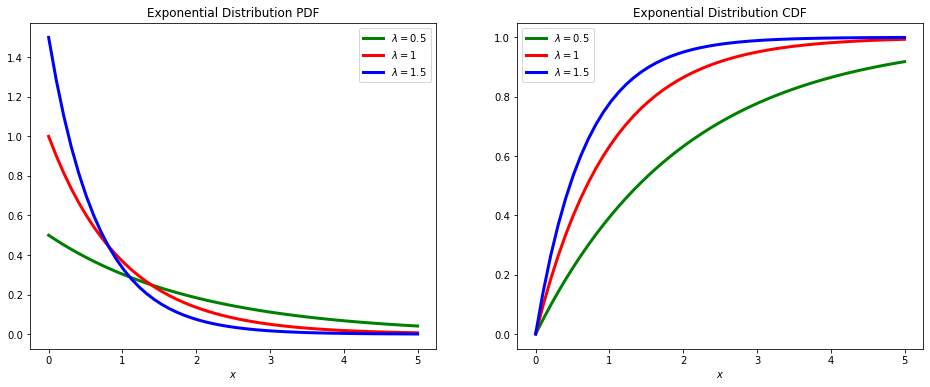

In [51]:
from scipy.stats import expon

parametros = [(0.5, "green"), (1, "red"), (1.5, "blue")]

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)  # panel 1

# evaluamos la pdf en este intervalo, 100 valores por defecto
x = np.linspace(0, 5)

for l, color in parametros:
    pdfx = expon.pdf(x, scale=1/l)
    plt.plot(x, pdfx, linestyle="-", color=color, linewidth=3, label=r"$\lambda=$"+str(l))
plt.title("Exponential Distribution PDF")
plt.xlabel(r"$x$")
l=plt.legend()

plt.subplot(1,2,2)  # panel 2

for l, color in parametros:
    cdfx = expon.cdf(x, scale=1/l)
    plt.plot(x, cdfx, linestyle="-", color=color, linewidth=3, label=r"$\lambda=$"+str(l))
plt.title("Exponential Distribution CDF")
plt.xlabel(r"$x$")
l=plt.legend()

<a id="expone1"></a>
### Ejemplo

[Volver al índice](#toc)

- Sea
$X =$cantidad de tiempo (en minutos) que un empleado postal atiende a un cliente. Se sabe que el tiempo de atención tiene una distribución exponencial con una cantidad promedio de tiempo igual a cuatro minutos ($\beta=4$).
  - $X$ es una variable aleatoria continua, dado que estamos midiendo tiempo, y sabemos que $X\sim Expo(\lambda=1/4)$.
  
- Calcule la probabilidad de que un empleado pase de cuatro a cinco minutos con un cliente seleccionado al azar.

$$
P(4\leq X \leq 5)=\int_{x_1}^{x_2} \lambda e^{-\lambda x} dx = 
\int_{4}^{5} \frac{1}{4} e^{-\frac{1}{4} x} dx = e^{-\frac{1}{4} 4} - e^{-\frac{1}{4} 5} = 0.08137.
$$

  - Usando la CDF:
  
  $$P(4\leq X \leq 5) = F(5) - F(4) = 1-e^{-\lambda \cdot 5} - (1-e^{-\lambda \cdot 4}) = 
  e^{-\lambda \cdot 4} - e^{-\lambda \cdot 5} = 
  e^{-\frac{1}{4} \cdot 4} - e^{-\frac{1}{4} \cdot 5} = 0.08137$$

- ¿La mitad de todos los clientes terminan en cuánto tiempo? (Encuentre el percentil 50).

- ¿Cuál es mayor, la media o la mediana?

Integrando numéricamente: P(4<X<5) = 0.08137464473592741
Usando la CDF: P(4<X<5) = F(5) - F(4) = 0.08137464431125219


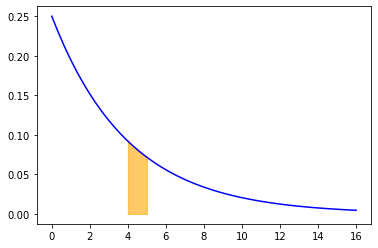

In [52]:
# parámetro de la distribución 
beta = 4

# evaluamos la pdf en este intervalo para x, de 0 a 16, usando 100 valores por defecto
x = np.linspace(0, 16)

pdfx = expon.pdf(x, scale=beta)
plt.plot(x, pdfx, linestyle="-", color='blue')
x_prob = np.linspace(4, 5, 1000)  # 1000 puntos para evaluar integral entre 4 y 5
plt.fill_between(x_prob, expon.pdf(x_prob, scale=beta), color='orange', alpha=0.6)

print('Integrando numéricamente: P(4<X<5) =', np.trapz(expon.pdf(x_prob, scale=beta), x_prob))
print('Usando la CDF: P(4<X<5) = F(5) - F(4) =', expon.cdf(5, scale=beta) - expon.cdf(4, scale=beta))

- ¿La mitad de todos los clientes terminan en cuánto tiempo? (Encuentre el percentil 50, Q2).

```Python
expon.ppf(0.5, scale=beta)
```

- El valor de 0.5 equivale al percentil 50, $P(X \leq x) = 0.5$.
  - La función cuantil devuelve el valor de $x$ para el que se cumple esta condición, es decir la mediana.

F(Q2) = F(2.7726)= 0.5


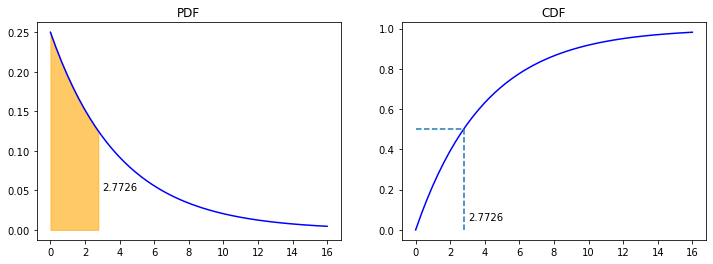

In [53]:
# Usando la función cuantil calculamos la mediana 
mediana = expon.ppf(0.5, scale=beta)  # percentil 50, Q2

# evaluamos la pdf en este intervalo para x, de 0 a 16, usando 100 valores por defecto
x = np.linspace(0, 16)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)  # Panel 1 PDF
pdfx = expon.pdf(x, scale=beta)
plt.plot(x, pdfx, linestyle="-", color='blue')
x_prob = np.linspace(0, mediana)  # sombreamos hasta la mediana
plt.fill_between(x_prob, expon.pdf(x_prob, scale=beta), color='orange', alpha=0.6)
plt.text(mediana+0.25, 0.05, np.round(mediana,4))
title = plt.title("PDF")

plt.subplot(1,2,2)  # Panel 2 CDF
cdfx = expon.cdf(x, scale=beta)
plt.plot(x, cdfx, linestyle="-", color='blue')
plt.hlines(0.5, 0, mediana, linestyles="dashed")
plt.vlines(mediana, 0, 0.5, linestyles="dashed")
plt.text(mediana+0.25, 0.05, np.round(mediana,4))
title = plt.title("CDF")

print("F(Q2) = F("+str(np.round(mediana,4))+')=', expon.cdf(mediana, scale=beta))

- Podemos ver que el área acumulada hasta la mediana $x=2.7726$ es de 0.5 en el panel izquierdo. 
- En el panel derecho se muestra la evaluación en la inversa de la acumulada, función cuantil, para obtener el valor de la mediana $Q_2 = x = F^{-1}(p) = 2.7726$.
- El valor esperado de nuestra variable aleatoria $X \sim Expo(\lambda=1/4)$ es de $\beta = \frac{1}{\lambda} = \frac{1}{\frac{1}{4}} = 4$.
- Tenemos que $2.7726 < 4$, es decir la mediana de la distribución exponencial es menor que la media $Q_2 < \beta$.
- Esto tiene sentido si pensamos en el gráfico de la función de densidad de probabilidad.
- Debido a la larga cola, esta distribución está sesgada hacia la derecha. 
- Cuando una distribución está sesgada a la derecha, la media suele estar a la derecha de la mediana.

<a id="exponsim"></a>
### Simulación de una v.a. exponencial

[Volver al índice](#toc)

- Cuando observamos un sistema, a lo que tenemos acceso es a una muestra finita de la población. 
  - Cuando asumimos que el sistema puede ser modelado con una distribución dada, siempre tenemos que comprobar que nuestra hipótesis es cierta. 
    - Esto se conoce como ajuste de distribuciones. 
  - Vamos a hacer un ejercicio simple y vamos a observar de manera visual el comportamiento de una muestra y compararlo con la distribución teórica.

- Vamos a realizar una simulación, un muestreo de una v.a. exponencial para el ejemplo anterior.
  - $X \sim Expo(\lambda=1/4)$, recuerde que la implementación en Python espera que pasemos $\beta=4$.
  - El tamaño de la muestra será de tamaño $n=100$.
  
```Python
np.random.seed(12345)  # semilla aleatoria, queremos replicabilidad

beta = 4  # parámetro beta
n = 100  # tamaño de muestra

# distribución.rvs(paramétros, size)
# genera un vector aleatorio a partir de la distribución y parámetros dados
# size: tamaño del vector devuelto
muestra = expon.rvs(beta, size=n)
```

- Graficaremos el histrograma para nuestra muestra (recuerde que al v.a. es continua) y compararemos con la distribución teórica de la población $X\sim Expo(\lambda=1/4)$.

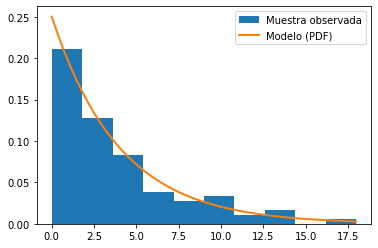

In [54]:
np.random.seed(1)  # semilla aleatoria, queremos replicabilidad

beta = 4  # parámetro beta
n = 100  # tamaño de muestra

muestra = expon.rvs(scale=beta, size=n)

plt.hist(muestra, density=True, label="Muestra observada")
x = np.linspace(0, muestra.max())
plt.plot(x, expon.pdf(x, scale=beta), linewidth=2, label="Modelo (PDF)")
legend = plt.legend()

- Respondamos la pregunta $P(4\leq X\leq 5)$, usando nuestra muestra. 
- Calculemos también la media muestral y veamos como se comparan estos valores con los resultados analíticos que ya conocemos de resolver el ejercicio.
  - Sabíamos que $P(4\leq X \leq 5) = 0.08137$.
  - El valor esperado de la v.a. es $E[X] = \beta = 4$, y su varianza $Var[X] = \beta^2 = 16$.

In [55]:
observaciones_favorables = len(np.where((muestra > 4) & (muestra < 5))[0])
total_de_obervaciones = len(muestra)  # tamaño de muestra, n
print("P(4<X<5) =", observaciones_favorables / total_de_obervaciones)
print("Media muestral =", muestra.mean())
# ddof=1 es el estimador no sesgado de la varianza muestral tal como lo hace pandas
print("Varianza muestral =", muestra.var(ddof=1))

P(4<X<5) = 0.1
Media muestral = 3.7929579929566235
Varianza muestral = 13.429753013023314


- Repliquemos el gráfico usando seaborn.

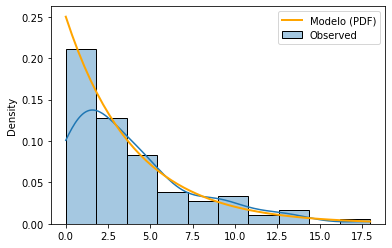

In [56]:
sns.histplot(x=muestra, stat='density', kde=True, alpha=0.4, label="Observed")
x = np.linspace(0, muestra.max())
plt.plot(x, expon.pdf(x, scale=beta), color="orange", linewidth=2, label="Modelo (PDF)")
legend = plt.legend()

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>

<a id="experience"></a>

[Volver al índice](#toc)

- Elija 3 __[distribuciones continuas comunes](https://drive.google.com/file/d/0B-dmEvN59Z2Za25CWV81bld4Zms/view)__ y grafique la PDF y la CDF para diferentes valores de los parámetros. 
  - Ej.: Distribuciones Beta, Gamma, Lognormal.
  - Investigue acerca de las propiedades de estas distribuciones.

- **(¡¡¡Importante!!!)** Repita el ejercicio anterior con las __[distribuciones t, F, $\chi^2$](https://drive.google.com/file/d/0B-dmEvN59Z2Za25CWV81bld4Zms/view)__ y grafique la PDF y la CDF para diferentes valores de los parámetros.
  - Investigue acerca de las propiedades de estas distribuciones.
  - **Este ejercicio es importante para la próxima sección: Estadística Inferencial.**

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/>

### Opcional: Practique Python

<br/>

## Anexos

### Anexo 1

[Volver al índice](#toc)

### Universality of the Uniform  

Let $F$ be a CDF which is a continuous function and strictly increasing on the support of the distribution. 
This ensures that the inverse function $F^{-1}$ exists, as a function from (0, 1) to $\mathbb{R}$. We then have
the following results.

1. Let $U \sim Unif(0, 1)$ and $X = F^{-1}(U)$.
Then $X$ is an r.v. with CDF $F$.
2. Let $X$ be an r.v. with CDF $F$. Then $F(X) \sim Unif(0, 1)$.

### Example:

Let $F$ be a CDF which is a 
continuous function and strictly increasing on the support of the distribution. 
This ensures that the inverse function $F^{-1}$ exists, as a function 
from (0, 1) to $\mathbb{R}$. Then,

1. Let $U \sim Unif(0, 1)$ and $X = F^{-1}(U)$.
Then $X$ is an r.v. with CDF $F$.
2. Let $X$ be an r.v. with CDF $F$. Then $F(X) \sim Unif(0, 1)$.


### Prove by simulation the Universality of the Uniform

- The first part of the theorem says that if we start with $U \sim Unif(0, 1)$ and a CDF $F$, 
then we can create an r.v. whose CDF is $F$ by plugging $U$ into the inverse CDF $F^{-1}$. 
Since  $F^{-1}$ is a function (known as the quantile function), $U$ is a random variable, and a
function of a random variable is a random variable, $F^{-1}(U)$ is a random variable;
universality of the Uniform says its CDF is $F$.
    

**1. Inverse transform sampling**

- Let $f(x) = \frac{x^3}{4}$ for $0 < x < 2$.
- Thus $F(x) = \frac{x^4}{16}$ and $F^{-1}(u) = 2 \times u^{1/4}$.

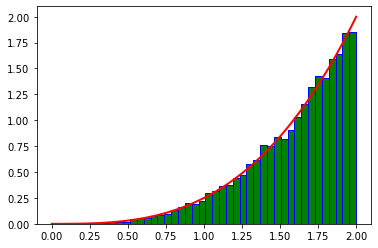

In [57]:
size = 10000
U = np.random.rand(size)  # Uniform distribution r.v.
X = 2*U**(1/4)  # Inverse transform sampling

# Let's plot the PDF
x = np.linspace(0, 2, 100)  # Range of X rvs
fx = x**3 / 4

plt.plot(x, fx, '-r', linewidth=2)  # pdf
h = plt.hist(X, bins=40, density=True, facecolor='green', edgecolor='blue')

**2.The second part of the theorem** goes in the reverse direction, starting from an r.v. $X$
whose CDF is $F$ and then creating a $Unif(0, 1)$ r.v. Again, $F$ is a function, $X$ is a
random variable, and a function of a random variable is a random variable, so $F (X)$
is a random variable. Since any CDF is between 0 and 1 everywhere, $F (X)$ must
take values between 0 and 1. 
Universality of the Uniform says that the distribution
of $F (X)$ is Uniform on (0, 1).

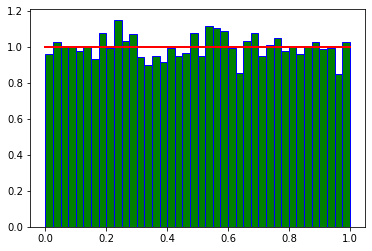

In [58]:
# We have generated a rvs from the inverse transform sampling

X = 2*U**(1/4)  # Inverse transform sampling
FX = X**4 / 16  # CDF(X)

# Let's check the distribution of FX
plt.hist(FX, bins=40, density=True, facecolor='green', edgecolor='blue')

# Plot the Unif(0,1) pdf
from scipy.stats import uniform
u = np.linspace(0, 1, 2)
fu = uniform.pdf(u)
plot = plt.plot(u, fu, '-r', linewidth=2)  # Unif(0,1) pdf

- **Let's check graphically the inverse transform sampling below**

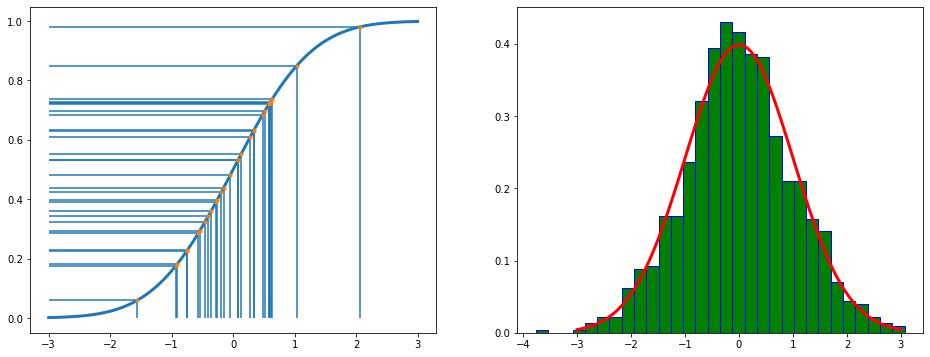

In [59]:
np.random.seed(123)

U = np.random.rand(30)  # Unif(0,1)

X = norm.ppf(U)  # F^-1 for a distribution N(0,1)

xn = np.linspace(-3,3,100)  # Support to plot
pdfn = norm.pdf(xn)  # pdf of N(0,1)
cdfn = norm.cdf(xn)  # cdf of N(0,1)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)  # panel 1

plt.hlines(U, -3, X)  # horizontal lines U(0,1)
plt.vlines(X, 0, U)  # vertical lines sampling result in X

plt.plot(xn, cdfn, linewidth=3)  # plot cdf curve
plt.plot(X, U, '.')  # X result vs U sampling

plt.subplot(1,2,2)  # panel 1

# You already know what is in X, generate 1000 values instead of 30
U = np.random.rand(1000)  # Unif(0,1)

X = norm.ppf(U)  # F^-1 for a distribution N(0,1)

plt.hist(X, density=True, bins=30, facecolor='green', edgecolor='blue')
l=plt.plot(xn, pdfn, '-r', linewidth=3)  # plot pdf curve

### Another example

- **Exponential distribution inverse transform sampling**, see slides 4-6 https://drive.google.com/file/d/0B-dmEvN59Z2ZZFZ0bTdLMTV1bHc/view.
  - Check the PDF, CDF and the inverse of the CDF. 

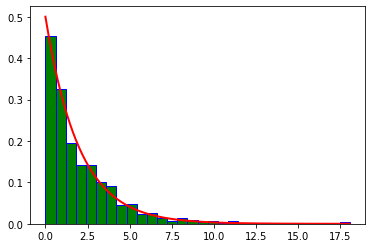

In [60]:
size = 1000
lam = 0.5

U = np.random.rand(size)
X = -1 / lam * np.log(U)  # quantile function

# Let's check the distribution of E
plt.hist(X, bins=30, density=True, facecolor='green', edgecolor='blue')

# Let's plot a theoretical pdf
from scipy.stats import expon

x = np.linspace(0, np.max(X), 100)
fx = expon.pdf(x, scale=1/lam)  # expon(0.5) pdf
plot=plt.plot(x, fx, '-r', linewidth=2)

### Anexo 2

[Volver al índice](#toc)

### Relationship betweenPoisson and Exponential distribution

- The exponential distribution models the time between events, while the Poisson is used to represent the number of events within a unit of time. Both distributions are a function of the rate parameter, $\lambda$.
- The mean of the exponential distribution is $1/\lambda$
and can be expressed in time units (e.g. sec). 
- $\lambda$ corresponds to the mean in the matching Poisson distribution, and is the expected number of events per unit of time, which would be expressed in inverse time units (e.g. 1/sec).
- Provided that the Poisson distribution makes reference to 1 time unit, the rate parameter 
$\lambda$ is identical in both distributions.
- In the following cell, this relationship is verified by simulation   
- See also the discussion in: https://stats.stackexchange.com/questions/2092/relationship-between-poisson-and-exponential-distribution

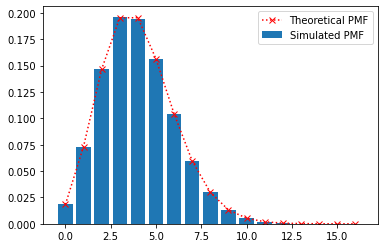

In [61]:
from scipy.stats import expon
from scipy.stats import poisson

lmbda = 4  # success rate, 4 calls / hour 
t = 1  # 1 hour
beta = 1 / lmbda  # expon implementation in Python requires beta

QF = lambda u: -1/lmbda*np.log(1-u)  # Quantil function 

def received_calls():
    a = [0.0]
    while a[-1] < t:
        #a += [a[-1] + expon.rvs(scale=1/lmbda)]
        a += [a[-1] + QF(np.random.random())]

    return len(a[1:-1])

sims = 100000
Calls = [received_calls() for i in range(sims)]
x, f = np.unique(Calls, return_counts=True)
plt.bar(x, f/sum(f), label='Simulated PMF')  # Simulated PMF
plt.plot(x, poisson.pmf(x, lmbda), ':xr', label='Theoretical PMF')
legend = plt.legend()